<div style="background-color: white; padding: 20px; border-radius: 8px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1); color: #333; font-family: Arial, sans-serif;">
    <h3 style="font-size: 22px; font-weight: bold; color: #20639B; margin-bottom: 10px;">1. Import Libraries </h3>
    
</div>


In [17]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import wave
import pylab
import itertools
import librosa
import librosa.display
from tensorflow.keras import layers, models, callbacks
from keras.utils import plot_model
from pathlib import Path
from sklearn.model_selection import train_test_split
from scipy import signal
from scipy.io import wavfile
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report


import warnings
warnings.filterwarnings ('ignore')


In [3]:
pip install tensorflow==2.9.1


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 84.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 78.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 39.6 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 24.3.25
    Uninstalling flatbuffers-24.3.25:
      Successfully uninstalled flatbuffers-24.3.25
  Attempting uninstall: tensorboard-data-serve

<div style="background-color: white; padding: 20px; border-radius: 8px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1); color: #333; font-family: Arial, sans-serif;">
    <h3 style="font-size: 22px; font-weight: bold; color: #20639B; margin-bottom: 10px;">2. Preprocessing </h3>
    
</div>


In [19]:
INPUT_DIR = '/content/drive/MyDrive/Dataset/Natural disaster prediction by behaviour of birds'

files_in_dir = os.listdir(INPUT_DIR)

print(files_in_dir)

['disaster predicted birds sound', 'normal birds sound']


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


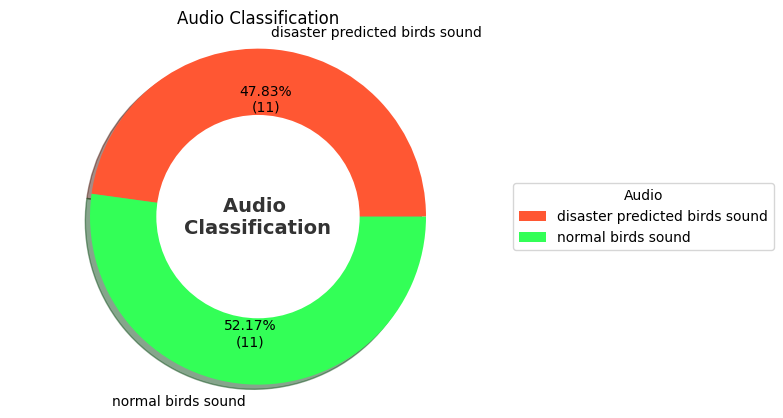

In [20]:
# subdirectories = [subdir for subdir in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR, subdir))]
# num_wav_files = []
# for subdir in subdirectories:
#     subdir_path = os.path.join(INPUT_DIR, subdir)
#     wav_files = [file for file in os.listdir(subdir_path) if file.endswith('.wav')]
#     num_wav_files.append(len(wav_files))

# total_files = sum(num_wav_files)
# percentages = [(num_files / total_files) * 100 for num_files in num_wav_files]

# unique_emotion = subdirectories
# colors = ['#FF5733', '#33FF57', '#3373FF']


# explode = [0] * len(unique_emotion)

# fig, ax = plt.subplots()

# wedges, texts, autotexts = ax.pie(
#     x=num_wav_files,
#     labels=unique_emotion,
#     autopct=lambda p: f'{p:.2f}%\n({int(p*total_files/100)})',
#     wedgeprops=dict(width=0.7),
#     textprops=dict(size=10, color="black"),
#     pctdistance=0.7,
#     colors=colors,
#     explode=explode,
#     shadow=True
# )

# center_circle = plt.Circle((0, 0), 0.6, color='white', fc='white', linewidth=1.25)
# fig.gca().add_artist(center_circle)

# ax.text(0, 0, 'Audio \nClassification', ha='center', va='center', fontsize=14, fontweight='bold', color='#333333')

# ax.legend(unique_emotion, title="Audio", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# ax.axis('equal')
# plt.title('Audio Classification')

# plt.show()
#######################################################################################################################


# Define input directory for your dataset
INPUT_DIR = '/content/drive/MyDrive/Dataset/Natural disaster prediction by behaviour of birds'

# Get list of subdirectories (categories of sounds)
subdirectories = [subdir for subdir in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR, subdir))]

# Count the number of .wav files in each subdirectory
num_wav_files = []
for subdir in subdirectories:
    subdir_path = os.path.join(INPUT_DIR, subdir)
    wav_files = [file for file in os.listdir(subdir_path) if file.endswith('.wav')]
    num_wav_files.append(len(wav_files))

# Total number of files and percentage calculations
total_files = sum(num_wav_files)
percentages = [(num_files / total_files) * 100 for num_files in num_wav_files]

# Define labels and colors
unique_emotion = subdirectories  # This will hold 'normal birds sound' and 'disaster predicted birds sound'
colors = ['#FF5733', '#33FF57']  # Adjust colors if necessary

# Create pie chart
explode = [0] * len(unique_emotion)  # No slices explode

fig, ax = plt.subplots()

wedges, texts, autotexts = ax.pie(
    x=num_wav_files,
    labels=unique_emotion,
    autopct=lambda p: f'{p:.2f}%\n({int(p * total_files / 100)})',
    wedgeprops=dict(width=0.7),
    textprops=dict(size=10, color="black"),
    pctdistance=0.7,
    colors=colors,
    explode=explode,
    shadow=True
)

# Draw center circle for aesthetics
center_circle = plt.Circle((0, 0), 0.6, color='white', fc='white', linewidth=1.25)
fig.gca().add_artist(center_circle)

# Add title and legend
ax.text(0, 0, 'Audio \nClassification', ha='center', va='center', fontsize=14, fontweight='bold', color='#333333')
ax.legend(unique_emotion, title="Audio", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax.axis('equal')
plt.title('Audio Classification')

plt.show()

In [21]:
!pip install pydub   # Install pydub if you haven't already

import wave
import numpy as np
import matplotlib.pyplot as plt
import os
from pydub import AudioSegment

INPUT_DIR = '/content/drive/MyDrive/Dataset/Natural disaster prediction by behaviour of birds'

subdirectories = [subdir for subdir in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR, subdir))]

for subdir in subdirectories:
    subdir_path = os.path.join(INPUT_DIR, subdir)
    audio_files = [file for file in os.listdir(subdir_path) if file.endswith(('.mp3', '.wav'))]  # Get both MP3 and WAV files

    for i in range(min(5, len(audio_files))):
        file_path = os.path.join(subdir_path, audio_files[i])

        # Convert MP3 to WAV if necessary
        if file_path.endswith('.mp3'):
            sound = AudioSegment.from_mp3(file_path)
            file_path = file_path.replace('.mp3', '.wav')  # Create a temporary WAV file
            sound.export(file_path, format="wav")

        # Now process the WAV file using wave module
        signal_wave = wave.open(file_path, 'r')
        sample_rate = 16000
        sig = np.frombuffer(signal_wave.readframes(sample_rate), dtype=np.int16)

        plt.figure(figsize=(12, 6))
        plt.subplot(211)
        plt.title(f'Waveform: {audio_files[i]}')
        plt.plot(sig)
        plt.xlabel('Sample Rate * Time')
        plt.ylabel('Energy')

        plt.subplot(212)
        plt.specgram(sig, NFFT=1024, Fs=sample_rate, noverlap=900)
        plt.title(f'Frequency Spectrum: {audio_files[i]}')
        plt.xlabel('Time')
        plt.ylabel('Frequency')

        plt.tight_layout()
        plt.show()


















# subdirectories = [subdir for subdir in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR, subdir))]

# for subdir in subdirectories:
#     subdir_path = os.path.join(INPUT_DIR, subdir)
#     wav_files = [file for file in os.listdir(subdir_path) if file.endswith('.wav')]

#     for i in range(min(5, len(wav_files))):
#         file_path = os.path.join(subdir_path, wav_files[i])
#         signal_wave = wave.open(file_path, 'r')
#         sample_rate = 16000
#         sig = np.frombuffer(signal_wave.readframes(sample_rate), dtype=np.int16)

#         plt.figure(figsize=(12, 6))
#         plt.subplot(211)
#         plt.title(f'Waveform: {wav_files[i]}')
#         plt.plot(sig)
#         plt.xlabel('Sample Rate * Time')
#         plt.ylabel('Energy')

#         plt.subplot(212)
#         plt.specgram(sig, NFFT=1024, Fs=sample_rate, noverlap=900)
#         plt.title(f'Frequency Spectrum: {wav_files[i]}')
#         plt.xlabel('Time')
#         plt.ylabel('Frequency')

#         plt.tight_layout()
#         plt.show()



# import librosa.display

# subdirectories = [subdir for subdir in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR, subdir))]

# for subdir in subdirectories:
#     subdir_path = os.path.join(INPUT_DIR, subdir)
#     wav_files = [file for file in os.listdir(subdir_path) if file.endswith('.wav')]

#     for i in range(min(5, len(wav_files))):
#         file_path = os.path.join(subdir_path, wav_files[i])

#         # Load the audio file with librosa
#         sig, sample_rate = librosa.load(file_path, sr=None)  # Load audio file

#         plt.figure(figsize=(12, 6))

#         # Plot the waveform
#         plt.subplot(211)
#         plt.title(f'Waveform: {wav_files[i]}')
#         plt.plot(sig)
#         plt.xlabel('Samples')
#         plt.ylabel('Amplitude')

#         # Plot the spectrogram
#         plt.subplot(212)
#         D = librosa.amplitude_to_db(np.abs(librosa.stft(sig)), ref=np.max)
#         librosa.display.specshow(D, sr=sample_rate, x_axis='time', y_axis='log', cmap='coolwarm')
#         plt.title(f'Frequency Spectrum: {wav_files[i]}')
#         plt.colorbar(format='%+2.0f dB')

#         plt.tight_layout()
#         plt.show()




Output hidden; open in https://colab.research.google.com to view.

<div style="background-color: white; padding: 20px; border-radius: 8px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1); color: #333; font-family: Arial, sans-serif;">
    <h3 style="font-size: 22px; font-weight: bold; color: #20639B; margin-bottom: 10px;">3.Feature Extraction </h3>
    
</div>


In [22]:
def load_and_extract_spectrogram(file_path, n_mels=128, n_fft=2048, hop_length=512):
    y, sr = librosa.load(file_path, sr=None)
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    return mel_spec_db

In [23]:
subdirectories = [subdir for subdir in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR, subdir))]

In [24]:
# X = []
# y = []
# max_time_steps = 128
# for idx, subdir in enumerate(subdirectories):
#     subdir_path = os.path.join(INPUT_DIR, subdir)
#     wav_files = [file for file in os.listdir(subdir_path) if file.endswith('.wav')]

#     for wav_file in wav_files:
#         file_path = os.path.join(subdir_path, wav_file)
#         spectrogram = load_and_extract_spectrogram(file_path)
#         if spectrogram.shape[1] < max_time_steps:
#             pad_width = max_time_steps - spectrogram.shape[1]
#             spectrogram_padded = np.pad(spectrogram, ((0, 0), (0, pad_width)), mode='constant')
#             X.append(spectrogram_padded)
#         else:
#             X.append(spectrogram[:, :max_time_steps])  # Trim if spectrogram has more time steps
#         y.append(idx)  # Use class index as label


X = []
y = []
max_time_steps = 128

# Define a mapping for the classes based on your folder names
label_mapping = {
    'disaster predicted birds sound': 0,  # Class 0 for disaster-predicted bird sounds
    'normal birds sound': 1                # Class 1 for normal bird sounds
}

subdirectories = [subdir for subdir in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR, subdir))]

for subdir in subdirectories:
    subdir_path = os.path.join(INPUT_DIR, subdir)
    wav_files = [file for file in os.listdir(subdir_path) if file.endswith('.wav')]

    for wav_file in wav_files:
        file_path = os.path.join(subdir_path, wav_file)
        spectrogram = load_and_extract_spectrogram(file_path)

        # Padding or trimming the spectrogram as needed
        if spectrogram.shape[1] < max_time_steps:
            pad_width = max_time_steps - spectrogram.shape[1]
            spectrogram_padded = np.pad(spectrogram, ((0, 0), (0, pad_width)), mode='constant')
            X.append(spectrogram_padded)
        else:
            X.append(spectrogram[:, :max_time_steps])  # Trim if spectrogram has more time steps

        # Append the corresponding label based on the mapping
        y.append(label_mapping[subdir])  # Use the label mapping


In [25]:
X = np.array(X)
y = np.array(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

<div style="background-color: white; padding: 20px; border-radius: 8px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1); color: #333; font-family: Arial, sans-serif;">
    <h3 style="font-size: 22px; font-weight: bold; color: #20639B; margin-bottom: 10px;">4.CNN Modeling </h3>
    
</div>


In [26]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1:])),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dense(len(subdirectories), activation='softmax')
])


model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 batch_normalization_4 (Batc  (None, 126, 126, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_5 (Batc  (None, 61, 61, 64)       256       
 hNormalization)                                                 
                                                      

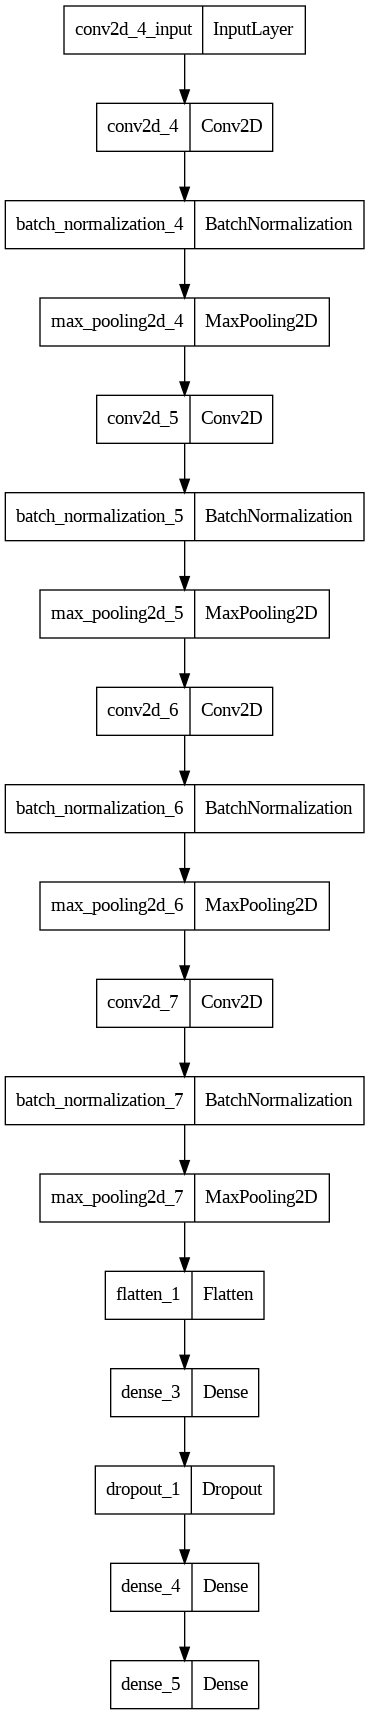

In [28]:
plot_model(model, to_file='model.png')

<div style="background-color: white; padding: 20px; border-radius: 8px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1); color: #333; font-family: Arial, sans-serif;">
    <h3 style="font-size: 22px; font-weight: bold; color: #20639B; margin-bottom: 10px;">4.Training and Validation </h3>
    
</div>


In [36]:
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=150, validation_data=(X_test, y_test))


Epoch 1/150
1/1 [==============================] - 1s 697ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 271.9635 - val_accuracy: 0.2000
Epoch 2/150
1/1 [==============================] - 1s 901ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 270.2108 - val_accuracy: 0.2000
Epoch 3/150
1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 268.3369 - val_accuracy: 0.2000
Epoch 4/150
1/1 [==============================] - 1s 985ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 266.4145 - val_accuracy: 0.2000
Epoch 5/150
1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 264.4570 - val_accuracy: 0.2000
Epoch 6/150
1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 262.4362 - val_accuracy: 0.2000
Epoch 7/150
1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 260.4056 - val_

In [37]:
evaluation_result = model.evaluate(X_test, y_test)

print("Test Loss:", evaluation_result[0])
print("Test Accuracy:", evaluation_result[1])

1/1 [==============================] - 0s 51ms/step - loss: 54.4031 - accuracy: 0.8000
Test Loss: 54.40314865112305
Test Accuracy: 0.800000011920929


In [43]:
from tensorflow.keras import layers, models

In [44]:
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))


In [45]:
# Define LSTM model
lstm_model = models.Sequential([
    layers.LSTM(64, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    layers.LSTM(64),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Use 'sigmoid' for binary classification
])

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [47]:
# Training LSTM model
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lstm_history = lstm_model.fit(X_train_lstm, y_train, epochs=100, validation_data=(X_test_lstm, y_test))


Epoch 1/100
1/1 [==============================] - 0s 172ms/step - loss: 0.6842 - accuracy: 0.6111 - val_loss: 0.6960 - val_accuracy: 0.4000
Epoch 2/100
1/1 [==============================] - 0s 149ms/step - loss: 0.6822 - accuracy: 0.6111 - val_loss: 0.6794 - val_accuracy: 0.4000
Epoch 3/100
1/1 [==============================] - 0s 135ms/step - loss: 0.6691 - accuracy: 0.5556 - val_loss: 0.6956 - val_accuracy: 0.4000
Epoch 4/100
1/1 [==============================] - 0s 136ms/step - loss: 0.6669 - accuracy: 0.5556 - val_loss: 0.6907 - val_accuracy: 0.4000
Epoch 5/100
1/1 [==============================] - 0s 152ms/step - loss: 0.6594 - accuracy: 0.5556 - val_loss: 0.6797 - val_accuracy: 0.4000
Epoch 6/100
1/1 [==============================] - 0s 159ms/step - loss: 0.6525 - accuracy: 0.6111 - val_loss: 0.6648 - val_accuracy: 0.4000
Epoch 7/100
1/1 [==============================] - 0s 145ms/step - loss: 0.6442 - accuracy: 0.6111 - val_loss: 0.6662 - val_accuracy: 0.4000
Epoch 8/100
1

In [48]:
# Evaluate LSTM model
lstm_eval = lstm_model.evaluate(X_test_lstm, y_test)
print("LSTM Test Loss:", lstm_eval[0])
print("LSTM Test Accuracy:", lstm_eval[1])

1/1 [==============================] - 0s 32ms/step - loss: 0.7074 - accuracy: 0.6000
LSTM Test Loss: 0.70742267370224
LSTM Test Accuracy: 0.6000000238418579


In [65]:
from tensorflow.keras import layers, models, callbacks

In [66]:
# Reshape your data for GRU
X_train_gru = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test_gru = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

In [67]:
# Define GRU model
gru_model = models.Sequential([
    layers.GRU(64, return_sequences=True, input_shape=(X_train_gru.shape[1], X_train_gru.shape[2])),
    layers.GRU(64),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Use 'sigmoid' for binary classification
])

gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [71]:

# Training GRU model
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
gru_history = gru_model.fit(X_train_gru, y_train, epochs=150, validation_data=(X_test_gru, y_test))


Epoch 1/150
1/1 [==============================] - 0s 176ms/step - loss: 0.2363 - accuracy: 0.8889 - val_loss: 3.0742 - val_accuracy: 0.0000e+00
Epoch 2/150
1/1 [==============================] - 0s 148ms/step - loss: 0.2096 - accuracy: 0.8889 - val_loss: 3.1823 - val_accuracy: 0.0000e+00
Epoch 3/150
1/1 [==============================] - 0s 164ms/step - loss: 0.2033 - accuracy: 0.8889 - val_loss: 3.2263 - val_accuracy: 0.0000e+00
Epoch 4/150
1/1 [==============================] - 0s 145ms/step - loss: 0.1971 - accuracy: 0.8889 - val_loss: 3.1710 - val_accuracy: 0.0000e+00
Epoch 5/150
1/1 [==============================] - 0s 150ms/step - loss: 0.1838 - accuracy: 0.8889 - val_loss: 3.1726 - val_accuracy: 0.2000
Epoch 6/150
1/1 [==============================] - 0s 160ms/step - loss: 0.1785 - accuracy: 0.9444 - val_loss: 3.2023 - val_accuracy: 0.2000
Epoch 7/150
1/1 [==============================] - 0s 153ms/step - loss: 0.1722 - accuracy: 0.9444 - val_loss: 3.2861 - val_accuracy: 0.20

In [72]:
# Evaluate GRU model
gru_eval = gru_model.evaluate(X_test_gru, y_test)
print("GRU Test Loss:", gru_eval[0])
print("GRU Test Accuracy:", gru_eval[1])

1/1 [==============================] - 0s 34ms/step - loss: 4.1593 - accuracy: 0.4000
GRU Test Loss: 4.1593098640441895
GRU Test Accuracy: 0.4000000059604645


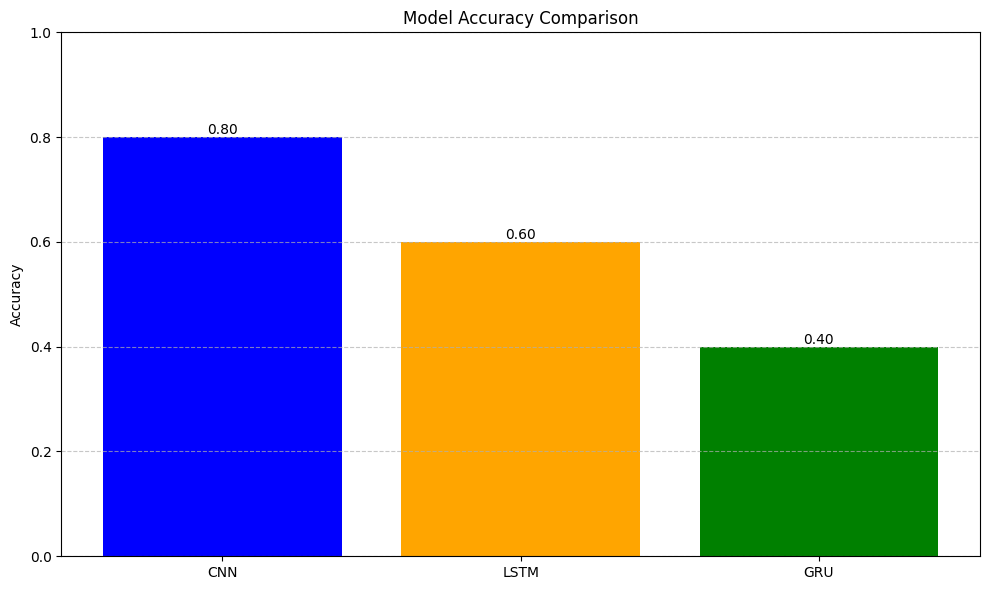

In [73]:

import matplotlib.pyplot as plt

# Example accuracy values (replace these with your actual accuracy values)
cnn_accuracy = 0.800000011920929 # CNN accuracy
lstm_accuracy = 0.6000000238418579 # LSTM accuracy
gru_accuracy = 0.4000000059604645  # GRU accuracy

# Model names
models = ['CNN', 'LSTM', 'GRU']
accuracies = [cnn_accuracy, lstm_accuracy, gru_accuracy]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'orange', 'green'])

# Add labels and title
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for accuracy
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the values on top of the bars
for index, value in enumerate(accuracies):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

In [78]:
# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()

# plt.subplot(1, 2, 2)
# plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Training and Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()

# plt.tight_layout()
# plt.show()

In [77]:
# y_pred = np.argmax(model.predict(X_test), axis=1)
# cm = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=subdirectories, yticklabels=subdirectories)
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.show()

# report = classification_report(y_test, y_pred, target_names=subdirectories)
# print(report)

In [76]:

# from google.colab import drive
# import os

# # Mount Google Drive
# drive.mount('/content/drive')

# # Create the directory if it doesn't exist
# os.makedirs('/content/drive/MyDrive/Dataset', exist_ok=True)

# # Define the path to save the model
# model_path = '/content/drive/MyDrive/Dataset/Naturaldisaster_model.h5'

# # Save the model
# model.save(model_path)

# # Verify the save
# print(os.listdir('/content/drive/MyDrive/Dataset'))


Subdirectories found: []
No results were collected. Please check your directories and WAV files.


In [75]:
# import os
# import numpy as np
# import librosa

# # Path to your disaster predicting folder
# folder_path = '/content/drive/MyDrive/Dataset/Natural disaster prediction by behaviour of birds/disaster predicted birds sound'

# # Function to preprocess audio files and classify
# def classify_audio(file_path):
#     # Load the audio file
#     audio, sr = librosa.load(file_path, sr=22050)  # Adjust sample rate as needed
#     # Extract features (e.g., MFCC)
#     mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)

#     # Calculate the mean of the MFCCs
#     mfcc_mean = np.mean(mfccs, axis=1)

#     # Simple thresholding rule
#     # This threshold can be adjusted based on the specific features you expect
#     if np.mean(mfcc_mean) > 0:  # Example condition
#         return 1  # Disaster
#     else:
#         return 0  # Normal

# # Iterate over files in the folder
# for file_name in os.listdir(folder_path):
#     if file_name.endswith('.mp3') or file_name.endswith('.wav'):
#         file_path = os.path.join(folder_path, file_name)
#         predicted_class = classify_audio(file_path)

#         # Print the results
#         print(f"File: {file_name}, Predicted class: {predicted_class}")

In [ ]:
model.save('disaster_predictor_model.keras')
print('Model saved to disaster_predictor_model.keras')

Model saved to disaster_predictor_model.keras


In [ ]:
import os
print("Current Working Directory:", os.getcwd())

Current Working Directory: /content


In [ ]:
model_filename = 'disaster_predictor_model.h5'
model.save(model_filename)

print(f'Model saved to {model_filename}')

Model saved to disaster_predictor_model.h5


In [74]:
# from google.colab import drive
# import os

# # Mount Google Drive
# drive.mount('/content/drive')

# # Create the directory if it doesn't exist
# os.makedirs('/content/drive/MyDrive/Dataset', exist_ok=True)

# # Define the path to save the model
# model_path = '/content/drive/MyDrive/Dataset/disaster_predictor_model.h5'

# # Save the model
# model.save(model_path)

# # Verify the save
# print(os.listdir('/content/drive/MyDrive/Dataset'))
